## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool
from sklearn.model_selection import train_test_split # import splitting data
from sklearn.metrics import mean_squared_error 


**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [80]:
df1 = pd.read_csv('data/USA_cars_datasets.csv',low_memory=False) # read csv
df1 = df1.loc[:,['price', 'year', 'mileage']]   # filter columns

print('null price:',sum(df1['price'].isnull()))
print('null year:',sum(df1['year'].isnull()))
print('null mileage:',sum(df1['mileage'].isnull()))
# yay, no n/a's to handle!

print('\ndescription:')
print(df1.describe())

df1.head()
# and can tell data is all numbers! yippee!

null price: 0
null year: 0
null mileage: 0

description:
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


2. Maxmin normalize `year` and `mileage`.

In [81]:
def maxmin(z):
    small = z.min()
    big = z.max()
    z = (z-small)/(big-small)
    return z

# Apply maxmin to each column of X to get U:
df1['year'] = pd.to_numeric(df1['year'], downcast='float')
df1['mileage'] = pd.to_numeric(df1['mileage'], downcast='float')

df1.loc[:,['year','mileage']] = df1.loc[:,['year','mileage']].apply(maxmin)

df1.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.

In [82]:
y1 = df1['price']
X1 = df1.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X1,y1, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

# code from knn notebook

4. Use the $k$ NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

In [83]:
def graph1(k):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_result = fitted_model.predict(X_test)
    plt.scatter(x=y_test,y=y_result, alpha=0.5)
    plt.xlabel("actual price")
    plt.ylabel("predicted price")
    plt.xlim(0,70000)
    plt.ylim(0,70000)
    mse = mean_squared_error(y_test, y_result)
    plt.title(f'k = {k}     MSE = {mse}')

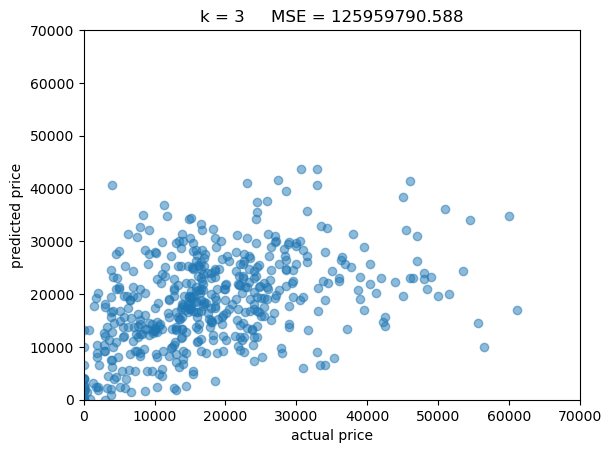

In [84]:
graph1(3)

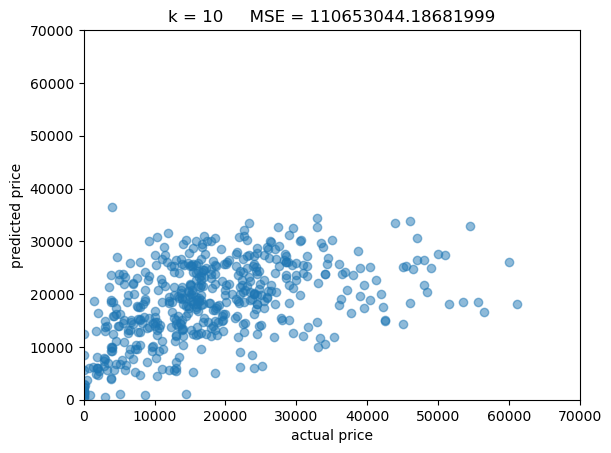

In [85]:
graph1(10)

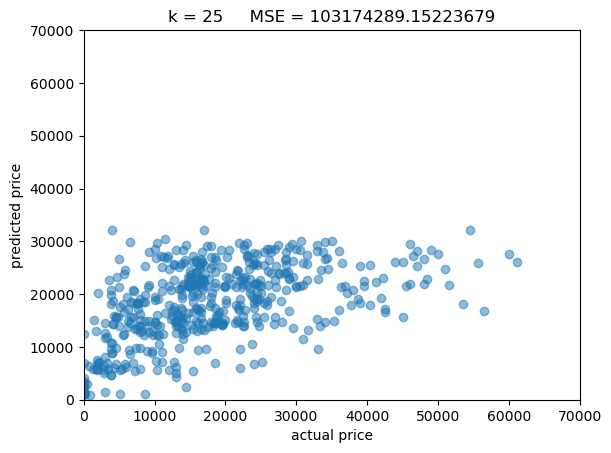

In [86]:
graph1(25)

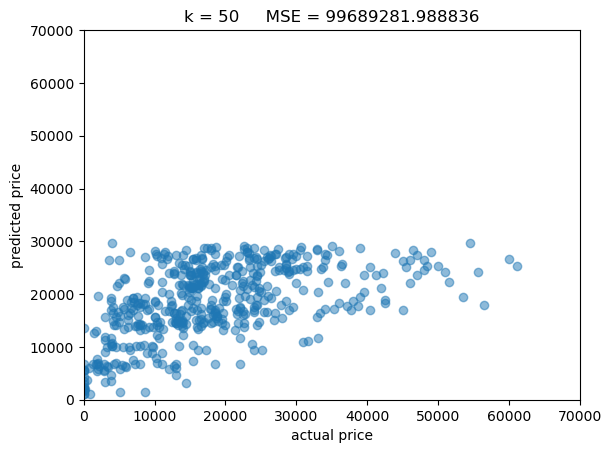

In [87]:
graph1(50)

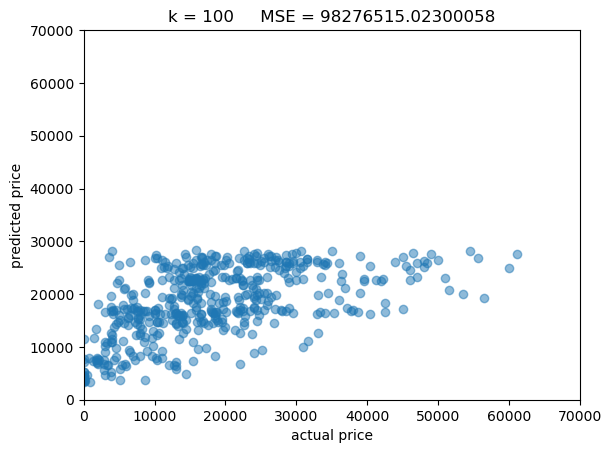

In [88]:
graph1(100)

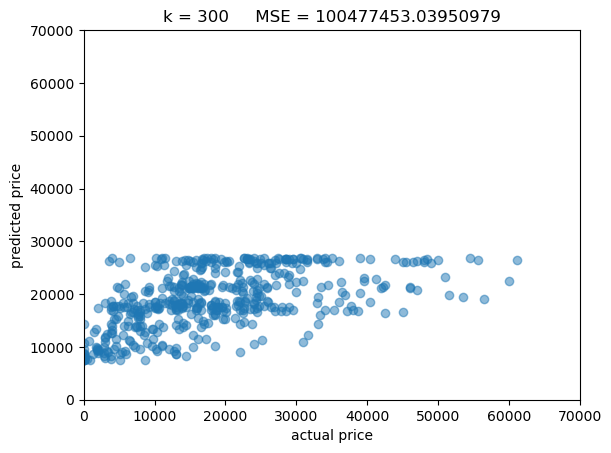

In [89]:
graph1(300)

In [90]:
# As k increases, the upper bound on predicted price decreases - goes from close to 50k to less than 30k
# also, the top flattens out, and it appears to be less like a line and more top-heavy to a line/more evenly distributed in that space
# as opposed to being all concentrated around the line where you would want it to be

5. Determine the optimal $k$ for these data.

Text(0.5, 1.0, 'best k: 77')

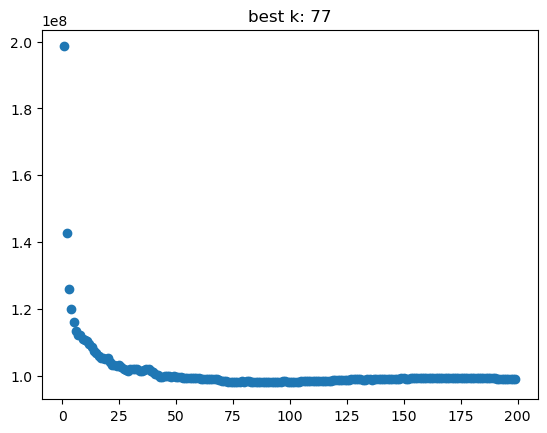

In [91]:
max = 200
mses = []

# calculate mse for a ton of values of k, add to an array
for k in range(1,max):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_result = fitted_model.predict(X_test)
    mses.append(mean_squared_error(y_result, y_test)) # sum((y_result - y_test) ** 2)) / len(y_test)

# plot all values of k vs mse, update title to show the index of the minimum one
    # note, I added 1 to the index because I didn't do a test with 0 buckets because that was unnecessary
plt.scatter(x=range(1,max),y=mses)
plt.title(f'best k: {mses.index(min(mses))+1}')

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

I set the _alpha_ value of the graphs to $0.5$ so I could see the concentration of points, and there were consistently more in the lower left quadrant of the graph. A simple glance (plus intuitive reasoning) explains this as there simply being far more points overall with a lower price point, and less which are more expensive - it is not an even distribution. Therefore, if there are too many or too few buckets, they'll be concentrated far more heavily towards the lower price point range, essentially putting a cap on the prediction as if beyond that point would just be occasional outliers. The extreme majority of the points are clustered below $30,000$, so most of the clusters will appear there, too. With too many buckets, the data is overfit to those smaller values because the number of close points is smaller, so there is a smaller reach, whearas with too few buckets, it's underfit because the buckets cannot capture an accurate spread of the data

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.

In [92]:
df2 = pd.read_csv('data/heart_failure_clinical_records_dataset.csv',low_memory=False) # read csv
df2 = df2.drop('time', axis=1)

print('null values:')
for col in df2.columns:
    print(f'null {col}:',sum(df2[col].isnull()))
# yay, no n/a's to handle!

print('\ndescription:')
print(df2.describe())

df2.head()
# and can tell data is all numbers! yippee!

null values:
null age: 0
null anaemia: 0
null creatinine_phosphokinase: 0
null diabetes: 0
null ejection_fraction: 0
null high_blood_pressure: 0
null platelets: 0
null serum_creatinine: 0
null serum_sodium: 0
null sex: 0
null smoking: 0
null DEATH_EVENT: 0

description:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


2. Make a correlation matrix. What variables are strongly associated with a death event?

In [93]:
df2.corr()
# age + DEATH_EVENT: 0.25
# serum_creatinine + DEATH_EVENT: 0.29
# everything else + DEATH_EVENT is less than 0.1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?

In [94]:
dummy = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for var in dummy:
    print(f'{var}:')
    print(df2[var].groupby(df2['DEATH_EVENT']).describe())

# death event is higher for anaemia (by 0.07) and high blood pressure (by 0.08)

anaemia:
             count      mean       std  min  25%  50%  75%  max
DEATH_EVENT                                                    
0            203.0  0.408867  0.492840  0.0  0.0  0.0  1.0  1.0
1             96.0  0.479167  0.502188  0.0  0.0  0.0  1.0  1.0
diabetes:
             count      mean       std  min  25%  50%  75%  max
DEATH_EVENT                                                    
0            203.0  0.418719  0.494569  0.0  0.0  0.0  1.0  1.0
1             96.0  0.416667  0.495595  0.0  0.0  0.0  1.0  1.0
high_blood_pressure:
             count      mean       std  min  25%  50%  75%  max
DEATH_EVENT                                                    
0            203.0  0.325123  0.469579  0.0  0.0  0.0  1.0  1.0
1             96.0  0.406250  0.493710  0.0  0.0  0.0  1.0  1.0
sex:
             count      mean       std  min  25%  50%  75%  max
DEATH_EVENT                                                    
0            203.0  0.650246  0.478071  0.0  0.0  1.0  1.0 

4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.

In [95]:
X2 = df2.loc[:,['anaemia', 'high_blood_pressure']]  # selected variables
y2 = df2['DEATH_EVENT']  # DEATH

5. Maxmin normalize all of the variables in `X`.

In [96]:
X2['anaemia'] = pd.to_numeric(X2['anaemia'], downcast='float')
X2['high_blood_pressure'] = pd.to_numeric(X2['high_blood_pressure'], downcast='float')

X2 = X2.apply(maxmin)
X2.head()

,anaemia,high_blood_pressure
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0


6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).

In [97]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

7. Determine the optimal number of neighbors for a $k$ NN regression for the variables you selected.

Text(0.5, 1.0, 'best k: 71\nMSE: 0.22167889968921511')

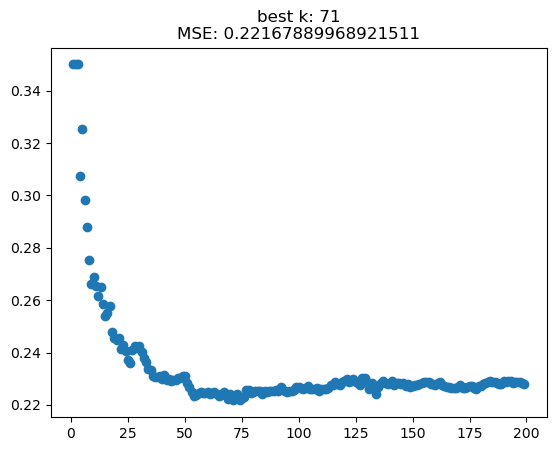

In [98]:
max2 = 200
mses2 = []

# calculate mse for a ton of values of k, add to an array
for k in range(1,max):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X2_train,y2_train)
    y2_result = fitted_model.predict(X2_test)
    mses2.append(mean_squared_error(y2_result, y2_test)) # sum((y_result - y_test) ** 2)) / len(y_test)

# plot all values of k vs mse, update title to show the index of the minimum one
    # note, I added 1 to the index because I didn't do a test with 0 buckets because that was unnecessary
plt.scatter(x=range(1,max2),y=mses2)
plt.title(f'best k: {mses2.index(min(mses2))+1}\nMSE: {min(mses2)}')

8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

Text(0.5, 1.0, 'best k (lowest SSE or MSE) with all variables: 19\nMSE: 0.192797783933518')

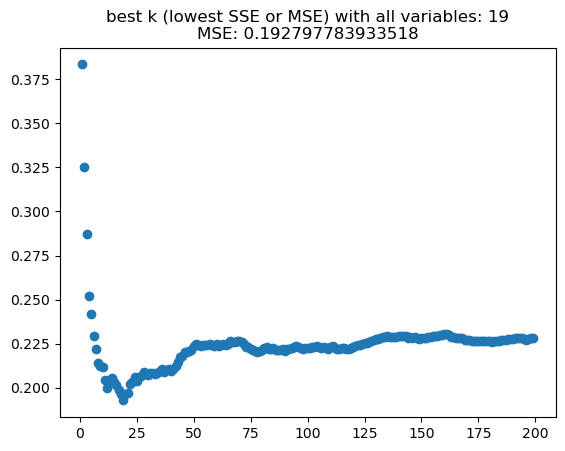

In [99]:
## ALL variables
vars_all = df2.columns[0:len(df2.columns)-1]
Xall = df2.loc[:,vars_all]  # selected variables

Xall = Xall.apply(maxmin)

Xall_train, Xall_test, yall_train, yall_test = train_test_split(Xall,y2, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

maxall = 200
msesall = []

# calculate mse for a ton of values of k, add to an array
for k in range(1,max):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(Xall_train,yall_train)
    yall_result = fitted_model.predict(Xall_test)
    msesall.append(mean_squared_error(yall_result, yall_test)) # sum((y_result - y_test) ** 2)) / len(y_test)

# plot all values of k vs mse, update title to show the index of the minimum one
    # note, I added 1 to the index because I didn't do a test with 0 buckets because that was unnecessary
plt.scatter(x=range(1,maxall),y=msesall)
plt.title(f'best k (lowest SSE or MSE) with all variables: {msesall.index(min(msesall))+1}\nMSE: {min(msesall)}')


Text(0.5, 1.0, 'best k (lowest SSE or MSE) with 2 vars w strong correlation to DEATH: 19\nMSE: 0.192797783933518')

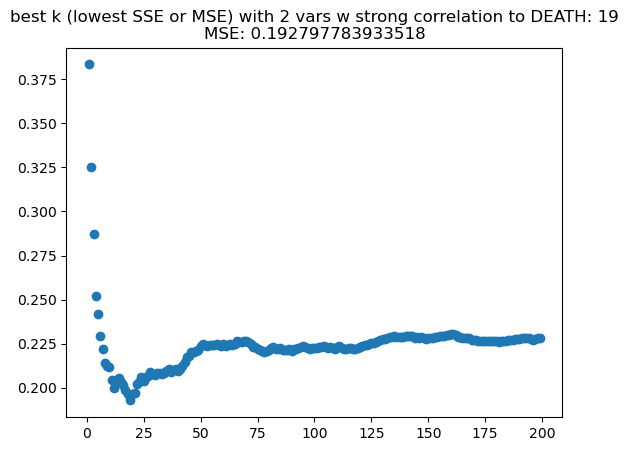

In [100]:
## age, serum_creatinine (the two with strong positive correlations from before)
vars_as = ['age','serum_creatinine']
Xas = df2.loc[:,vars_as]  # selected variables

Xas = Xall.apply(maxmin)

Xas_train, Xas_test, yas_train, yas_test = train_test_split(Xas,y2, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

maxas = 200
msesas = []

# calculate mse for a ton of values of k, add to an array
for k in range(1,maxas):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(Xas_train,yas_train)
    yas_result = fitted_model.predict(Xas_test)
    msesas.append(mean_squared_error(yas_result, yas_test)) # sum((y_result - y_test) ** 2)) / len(y_test)

# plot all values of k vs mse, update title to show the index of the minimum one
    # note, I added 1 to the index because I didn't do a test with 0 buckets because that was unnecessary
plt.scatter(x=range(1,maxas),y=msesas)
plt.title(f'best k (lowest SSE or MSE) with 2 vars w strong correlation to DEATH: {msesas.index(min(msesas))+1}\nMSE: {min(msesas)}')

Text(0.5, 1.0, 'best k (lowest SSE or MSE) with serum_sodium: 19\nMSE: 0.192797783933518')

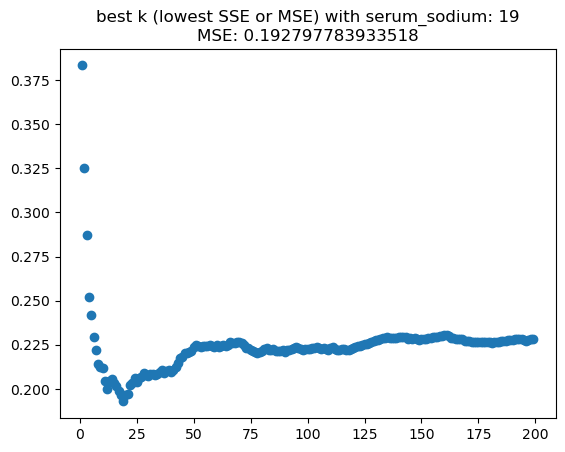

In [101]:
## serum_sodium (negative correlation to death)
vars_s = ['serum_sodium']
Xs = df2.loc[:,vars_s]  # selected variables

Xs = Xall.apply(maxmin)

Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs,y2, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

maxs = 200
msess = []

# calculate mse for a ton of values of k, add to an array
for k in range(1,maxs):
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(Xs_train,ys_train)
    ys_result = fitted_model.predict(Xs_test)
    msess.append(mean_squared_error(ys_result, ys_test)) # sum((y_result - y_test) ** 2)) / len(y_test)

# plot all values of k vs mse, update title to show the index of the minimum one
    # note, I added 1 to the index because I didn't do a test with 0 buckets because that was unnecessary
plt.scatter(x=range(1,maxs),y=msess)
plt.title(f'best k (lowest SSE or MSE) with serum_sodium: {msess.index(min(msess))+1}\nMSE: {min(msess)}')

In [102]:
# overall, the model with all variables (except time) had the lowest SSE, but not by much (0.03 compared to with 'anaemia' and 'high_blood_pressure')
# that doesn't feel like much of a benefit, especially considering how many more variables and work we're throwing in
# i suppose more accurate is alwasy better, but it takes a lot more work and resources for less gain each iteration
# interestingly, other relationships I tested did 'better' (lower SSE) than the supposed ideal from examining ones with high correlations:
#    looking at a relationship which previously had a negative correlation to DEATH was 0.02 better SSE than 'anaemia' and 'high_blood_pressure'
#    additionally, two other variables ('age', 'serum_creatinine') performed exactly as well as the vars with negative correlation
# more variables ≠ better results, but it's interesting to investigate

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)